# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

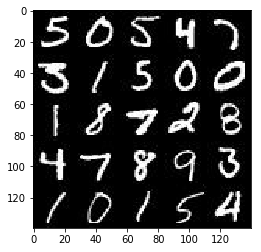

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

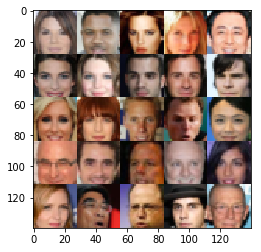

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    learning_rate = tf.placeholder(tf.float32)
    input_image = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels))
    z_data = tf.placeholder(tf.float32, (None, z_dim))

    return input_image, z_data, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [132]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    alpha = 0.2
    dim_seed = 32
    hight = images.shape[1]
    width = images.shape[2]
    kernal = 5
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        x = tf.layers.conv2d(images, dim_seed, kernal, strides=2, padding='Same')
        x = tf.maximum(alpha*x, x)
        
        x = tf.layers.conv2d(x, dim_seed*2, kernal, strides=2, padding='Same')
        x = tf.layers.batch_normalization(x, training=True)
        x = tf.maximum(alpha*x, x)

        x = tf.layers.conv2d(x, dim_seed*4, kernal, strides=2, padding='Same')
        x = tf.layers.batch_normalization(x, training=True)
        x = tf.maximum(alpha*x, x)
        
        x = tf.layers.conv2d(x, dim_seed*8, kernal, strides=2, padding='Same')
        x = tf.layers.batch_normalization(x, training=True)
        x = tf.maximum(alpha*x, x)
        
        x = tf.contrib.layers.flatten(x)
        logits = tf.layers.dense(x, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [133]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    dim_seed = 512
    kernel_size = 4
    dim_w_h = 3
    with tf.variable_scope('generator', reuse=not is_train):
        x = tf.layers.dense(z, dim_w_h*dim_w_h*dim_seed)
        x = tf.reshape(x, (-1, dim_w_h, dim_w_h, dim_seed))
        x = tf.maximum(alpha*x, x)

        x = tf.layers.conv2d_transpose(x, dim_seed//2, 3, strides=2, padding='Valid')
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha*x, x)
        
        x = tf.layers.conv2d_transpose(x, dim_seed//4, kernel_size, strides=2, padding='Same')
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha*x, x)
        
#         x = tf.layers.conv2d_transpose(x, dim_seed//8, kernel_size, strides=2, padding='Same')
#         x = tf.layers.batch_normalization(x, training=is_train)
#         x = tf.maximum(alpha*x, x)
        
        x = tf.layers.conv2d_transpose(x, out_channel_dim, kernel_size, strides=2, padding='Same')
        out = tf.tanh(x)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [134]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
#     ones_smooth = np.random.uniform(0.8, 1.1, size=tf.shape(d_model_real).shape)
    ones_smooth = np.random.uniform(0.85, 1, size=(1))
    zero_smooth = np.random.uniform(0, 0.1, size=(1))

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*ones_smooth))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)*zero_smooth))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [135]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [136]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [137]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    
    steps = 0
    losses = []
    
    # TODO: Build Model
#     tf.reset_default_graph()
    
    images, w, h, chan = data_shape
    input_real, input_z, lr = model_inputs(w, h, chan, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, chan)
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        saver = tf.train.Saver()
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                batch_images = batch_images*2
                
                # TODO: Train Model
                z = np.random.uniform(-1, 1, (batch_size, z_dim)) 
                
                _ = sess.run([d_opt], feed_dict={input_real: batch_images, input_z:z, lr:learning_rate})
                _ = sess.run([g_opt], feed_dict={input_z:z, input_real: batch_images, lr:learning_rate})
                _ = sess.run([g_opt], feed_dict={input_z:z, input_real: batch_images, lr:learning_rate})
                
                
                if steps % 100 == 0:
                    # print losses
                    d_loss_train = d_loss.eval(feed_dict={input_real: batch_images, input_z:z})
                    g_loss_train = g_loss.eval(feed_dict={input_z:z})
                    
                    print("Epoch {}/{}".format(epoch_i,epoch_count),
                          "Step {}".format(steps),
                          "Discriminator Loss, {}".format(d_loss_train),
                          "Generator Loss, {}".format(g_loss_train))
                    losses.append([d_loss_train, g_loss_train])
                
                if steps % 200 == 0:
                    show_generator_output(sess, 16, input_z, chan, data_image_mode)
                    
        saver.save(sess, './checkpoints/generator.ckpt')
        show_generator_output(sess, 16, input_z, chan, data_image_mode)
    
    return losses

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2 Step 100 Discriminator Loss, 1.5891046524047852 Generator Loss, 0.5931463837623596
Epoch 0/2 Step 200 Discriminator Loss, 2.131063461303711 Generator Loss, 0.19495326280593872


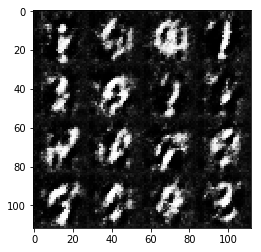

Epoch 0/2 Step 300 Discriminator Loss, 1.4959721565246582 Generator Loss, 0.7771923542022705
Epoch 0/2 Step 400 Discriminator Loss, 1.5259653329849243 Generator Loss, 0.5431962609291077


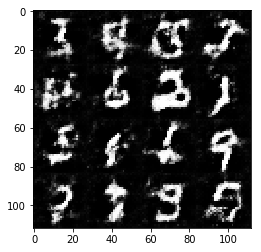

Epoch 0/2 Step 500 Discriminator Loss, 1.736746072769165 Generator Loss, 0.34282487630844116
Epoch 0/2 Step 600 Discriminator Loss, 1.6331442594528198 Generator Loss, 0.3687817454338074


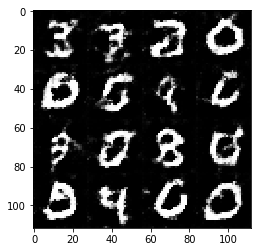

Epoch 0/2 Step 700 Discriminator Loss, 1.5998615026474 Generator Loss, 0.3799808919429779
Epoch 0/2 Step 800 Discriminator Loss, 1.689691424369812 Generator Loss, 0.36296314001083374


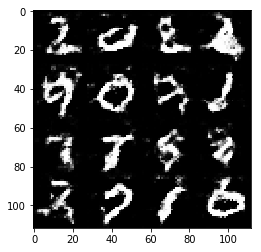

Epoch 0/2 Step 900 Discriminator Loss, 1.3951337337493896 Generator Loss, 0.5355651378631592
Epoch 0/2 Step 1000 Discriminator Loss, 1.400822401046753 Generator Loss, 0.8287844061851501


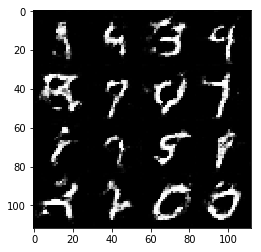

Epoch 0/2 Step 1100 Discriminator Loss, 1.1884599924087524 Generator Loss, 0.6427773237228394
Epoch 0/2 Step 1200 Discriminator Loss, 1.7024544477462769 Generator Loss, 0.3487110733985901


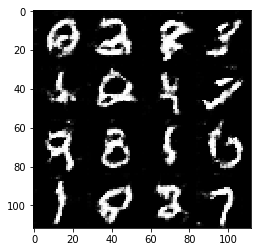

Epoch 0/2 Step 1300 Discriminator Loss, 1.893492341041565 Generator Loss, 0.2837908864021301
Epoch 0/2 Step 1400 Discriminator Loss, 1.743865728378296 Generator Loss, 0.3304511606693268


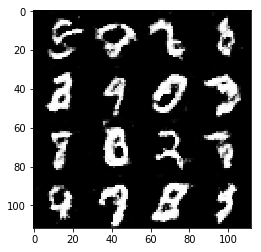

Epoch 0/2 Step 1500 Discriminator Loss, 2.324984550476074 Generator Loss, 0.18177348375320435
Epoch 0/2 Step 1600 Discriminator Loss, 1.7988190650939941 Generator Loss, 0.3199404180049896


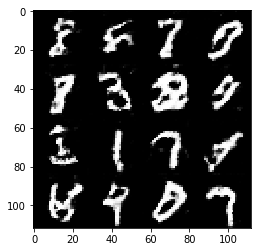

Epoch 0/2 Step 1700 Discriminator Loss, 2.0131349563598633 Generator Loss, 0.24360036849975586
Epoch 0/2 Step 1800 Discriminator Loss, 1.589653730392456 Generator Loss, 0.38994044065475464


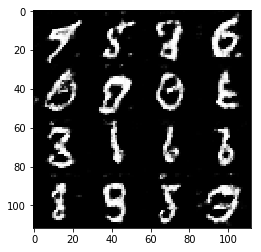

Epoch 1/2 Step 1900 Discriminator Loss, 2.0533876419067383 Generator Loss, 0.224871426820755
Epoch 1/2 Step 2000 Discriminator Loss, 2.1597485542297363 Generator Loss, 0.19560597836971283


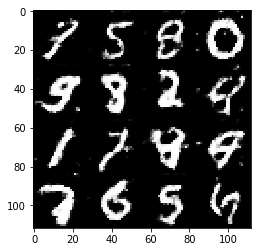

Epoch 1/2 Step 2100 Discriminator Loss, 2.693392753601074 Generator Loss, 0.13262410461902618
Epoch 1/2 Step 2200 Discriminator Loss, 1.9353737831115723 Generator Loss, 0.26225149631500244


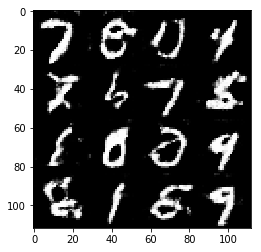

Epoch 1/2 Step 2300 Discriminator Loss, 2.087090492248535 Generator Loss, 0.29733937978744507
Epoch 1/2 Step 2400 Discriminator Loss, 2.0197091102600098 Generator Loss, 0.2640722393989563


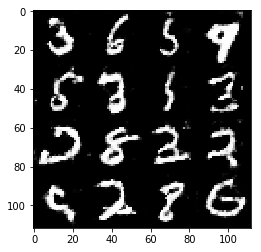

Epoch 1/2 Step 2500 Discriminator Loss, 2.2487969398498535 Generator Loss, 0.19661182165145874
Epoch 1/2 Step 2600 Discriminator Loss, 0.8915947079658508 Generator Loss, 1.0397090911865234


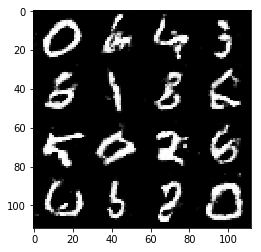

Epoch 1/2 Step 2700 Discriminator Loss, 1.6838771104812622 Generator Loss, 0.3491365909576416
Epoch 1/2 Step 2800 Discriminator Loss, 1.4558122158050537 Generator Loss, 0.5172029733657837


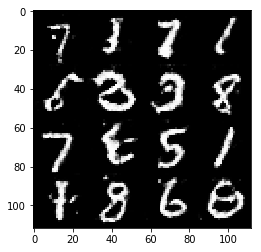

Epoch 1/2 Step 2900 Discriminator Loss, 1.6105825901031494 Generator Loss, 1.1776677370071411
Epoch 1/2 Step 3000 Discriminator Loss, 2.336331367492676 Generator Loss, 0.205955371260643


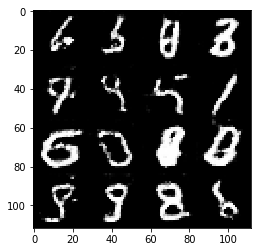

Epoch 1/2 Step 3100 Discriminator Loss, 1.5507127046585083 Generator Loss, 0.4184165596961975
Epoch 1/2 Step 3200 Discriminator Loss, 1.5676028728485107 Generator Loss, 0.5304384231567383


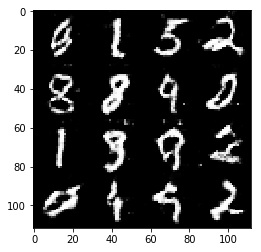

Epoch 1/2 Step 3300 Discriminator Loss, 1.6228570938110352 Generator Loss, 0.3578571677207947
Epoch 1/2 Step 3400 Discriminator Loss, 1.8006911277770996 Generator Loss, 0.3557394742965698


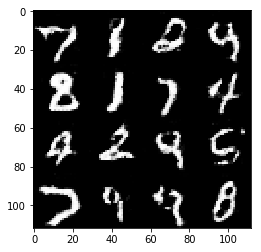

Epoch 1/2 Step 3500 Discriminator Loss, 1.5312857627868652 Generator Loss, 0.4355286955833435
Epoch 1/2 Step 3600 Discriminator Loss, 1.6405830383300781 Generator Loss, 0.3714222311973572


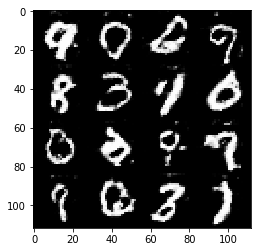

Epoch 1/2 Step 3700 Discriminator Loss, 1.9282609224319458 Generator Loss, 0.25587397813796997


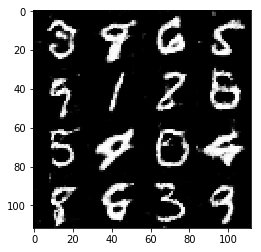

In [140]:
batch_size, z_dim, learning_rate, beta1 = 64, 50, 0.0005, 0.3 # No
### .... lots of iterating ###
### I landed on batch size of 25 mostly because it displays well.
batch_size, z_dim, learning_rate, beta1 = 25, 200, 0.0005, 0.3 #No 0.9, 128
batch_size, z_dim, learning_rate, beta1 = 25, 200, 0.00005, 0.3 #No 0.9, 128
batch_size, z_dim, learning_rate, beta1 = 25, 200, 0.0005, 0.25 #this isn't working 0.9, 128

### fixed bug in discriminator
batch_size, z_dim, learning_rate, beta1 = 25, 100, 0.0005, 0.25 #took to long to train
batch_size, z_dim, learning_rate, beta1 = 25, 100, 0.001, 0.2 #trained really fast

## bump generator starting dim to 256
batch_size, z_dim, learning_rate, beta1 = 25, 100, 0.0008, 0.3 #to slow
batch_size, z_dim, learning_rate, beta1 = 25, 100, 0.001, 0.3 #better but not quite

## bump discriminitor dim seed to 32 to follow DCGAN
batch_size, z_dim, learning_rate, beta1 = 25, 100, 0.001, 0.3 #better
batch_size, z_dim, learning_rate, beta1 = 25, 100, 0.0007, 0.3 #better but not quite
batch_size, z_dim, learning_rate, beta1 = 25, 100, 0.0006, 0.3 #better but not quite
batch_size, z_dim, learning_rate, beta1 = 25, 200, 0.0006, 0.3 #better number gen seem more stable
batch_size, z_dim, learning_rate, beta1 = 25, 200, 0.0004, 0.3 #worse
batch_size, z_dim, learning_rate, beta1 = 25, 200, 0.0006, 0.4 #good

## bump dim seed on generator for 512, closert ot DCGAN
batch_size, z_dim, learning_rate, beta1 = 25, 200, 0.0005, 0.3 #good, but could go lower in lr or beta1
batch_size, z_dim, learning_rate, beta1 = 25, 200, 0.0004, 0.5 #nope
batch_size, z_dim, learning_rate, beta1 = 32, 200, 0.0007, 0.5 #good, number still not crisp
batch_size, z_dim, learning_rate, beta1 = 64, 200, 0.0005, 0.3 #really bad?
batch_size, z_dim, learning_rate, beta1 = 64, 200, 0.0008, 0.3 #good, number still not crisp
batch_size, z_dim, learning_rate, beta1 = 32, 200, 0.0006, 0.3 #good, number still not crisp
batch_size, z_dim, learning_rate, beta1 = 32, 200, 0.0006, 0.1 #good, number still not crisp
batch_size, z_dim, learning_rate, beta1 = 32, 200, 0.0007, 0.1 #good, number still not crisp

#Going deeper
batch_size, z_dim, learning_rate, beta1 = 32, 200, 0.00025, 0.3 #good, number still not crisp

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1 Step 100 Discriminator Loss, 1.8538784980773926 Generator Loss, 0.3111550509929657
Epoch 0/1 Step 200 Discriminator Loss, 2.0424513816833496 Generator Loss, 0.2701151371002197


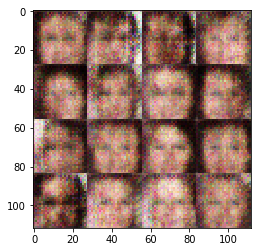

Epoch 0/1 Step 300 Discriminator Loss, 1.4799904823303223 Generator Loss, 0.6020836234092712
Epoch 0/1 Step 400 Discriminator Loss, 1.54787278175354 Generator Loss, 0.5473902225494385


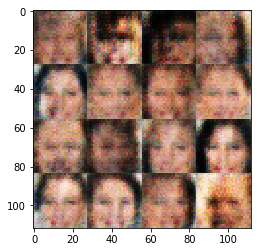

Epoch 0/1 Step 500 Discriminator Loss, 1.5094680786132812 Generator Loss, 0.5040123462677002
Epoch 0/1 Step 600 Discriminator Loss, 1.6052162647247314 Generator Loss, 0.4878706932067871


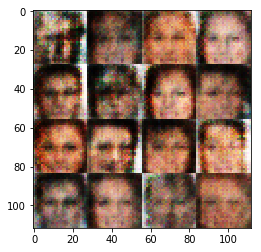

Epoch 0/1 Step 700 Discriminator Loss, 1.6534292697906494 Generator Loss, 0.4770164489746094
Epoch 0/1 Step 800 Discriminator Loss, 1.5331239700317383 Generator Loss, 0.5866542458534241


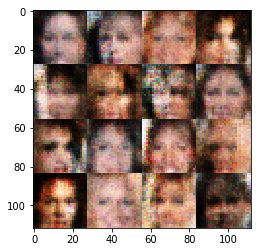

Epoch 0/1 Step 900 Discriminator Loss, 1.634389877319336 Generator Loss, 0.4780784845352173
Epoch 0/1 Step 1000 Discriminator Loss, 1.5030670166015625 Generator Loss, 0.5746318101882935


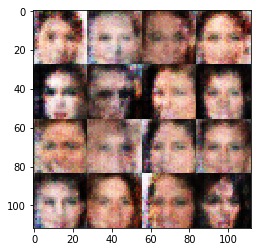

Epoch 0/1 Step 1100 Discriminator Loss, 1.4440903663635254 Generator Loss, 0.6006366014480591
Epoch 0/1 Step 1200 Discriminator Loss, 1.5619206428527832 Generator Loss, 0.518072783946991


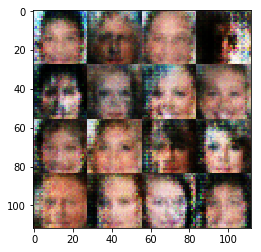

Epoch 0/1 Step 1300 Discriminator Loss, 1.4394389390945435 Generator Loss, 0.5685600638389587
Epoch 0/1 Step 1400 Discriminator Loss, 1.8167952299118042 Generator Loss, 0.3801995515823364


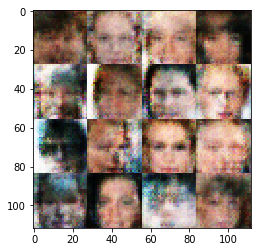

Epoch 0/1 Step 1500 Discriminator Loss, 1.5182453393936157 Generator Loss, 0.5706369876861572
Epoch 0/1 Step 1600 Discriminator Loss, 1.6776821613311768 Generator Loss, 0.4867508113384247


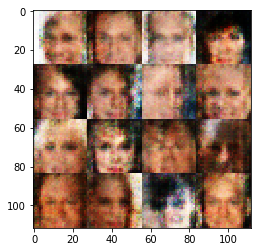

Epoch 0/1 Step 1700 Discriminator Loss, 1.5738534927368164 Generator Loss, 0.5325963497161865
Epoch 0/1 Step 1800 Discriminator Loss, 1.5271492004394531 Generator Loss, 0.5477559566497803


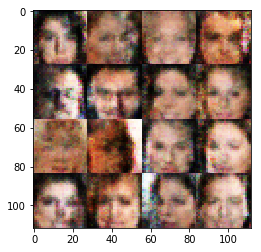

Epoch 0/1 Step 1900 Discriminator Loss, 1.577130675315857 Generator Loss, 0.5317016243934631
Epoch 0/1 Step 2000 Discriminator Loss, 1.5533380508422852 Generator Loss, 0.5433081388473511


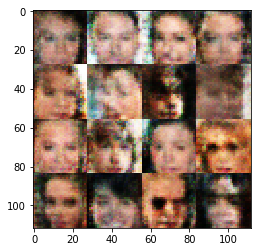

Epoch 0/1 Step 2100 Discriminator Loss, 1.4974100589752197 Generator Loss, 0.5631022453308105
Epoch 0/1 Step 2200 Discriminator Loss, 1.4761848449707031 Generator Loss, 0.5943842530250549


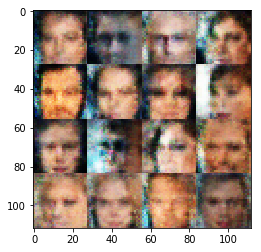

Epoch 0/1 Step 2300 Discriminator Loss, 1.615096926689148 Generator Loss, 0.5029735565185547
Epoch 0/1 Step 2400 Discriminator Loss, 1.4611420631408691 Generator Loss, 0.5663884878158569


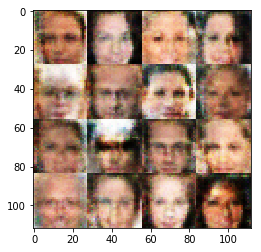

Epoch 0/1 Step 2500 Discriminator Loss, 1.5115326642990112 Generator Loss, 0.5727180242538452
Epoch 0/1 Step 2600 Discriminator Loss, 1.5183825492858887 Generator Loss, 0.5797174572944641


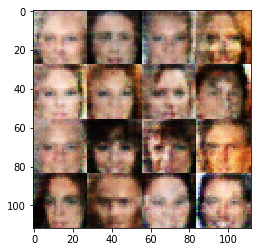

Epoch 0/1 Step 2700 Discriminator Loss, 1.4584553241729736 Generator Loss, 0.5956913828849792
Epoch 0/1 Step 2800 Discriminator Loss, 1.4788624048233032 Generator Loss, 0.5821923017501831


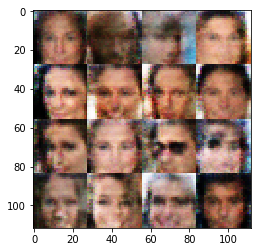

Epoch 0/1 Step 2900 Discriminator Loss, 1.4072277545928955 Generator Loss, 0.6468154191970825
Epoch 0/1 Step 3000 Discriminator Loss, 1.5376942157745361 Generator Loss, 0.5688654184341431


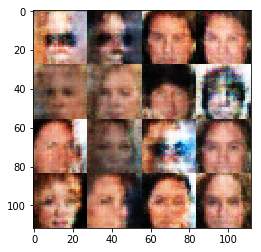

Epoch 0/1 Step 3100 Discriminator Loss, 1.4798083305358887 Generator Loss, 0.6144715547561646
Epoch 0/1 Step 3200 Discriminator Loss, 1.476730227470398 Generator Loss, 0.5929123759269714


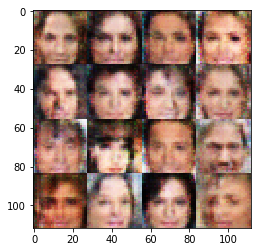

Epoch 0/1 Step 3300 Discriminator Loss, 1.6070237159729004 Generator Loss, 0.5489169359207153
Epoch 0/1 Step 3400 Discriminator Loss, 1.4506099224090576 Generator Loss, 0.6324427127838135


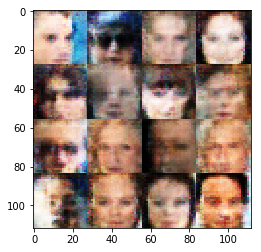

Epoch 0/1 Step 3500 Discriminator Loss, 1.6496608257293701 Generator Loss, 0.49531760811805725
Epoch 0/1 Step 3600 Discriminator Loss, 1.4515397548675537 Generator Loss, 0.5952079892158508


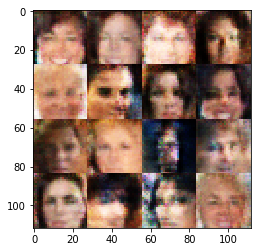

Epoch 0/1 Step 3700 Discriminator Loss, 1.6532137393951416 Generator Loss, 0.5022241473197937
Epoch 0/1 Step 3800 Discriminator Loss, 1.5007915496826172 Generator Loss, 0.5847893357276917


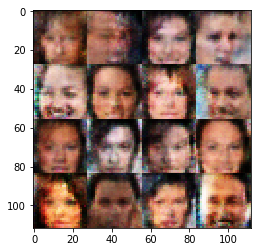

Epoch 0/1 Step 3900 Discriminator Loss, 1.4831452369689941 Generator Loss, 0.5712341070175171
Epoch 0/1 Step 4000 Discriminator Loss, 1.6410496234893799 Generator Loss, 0.46722283959388733


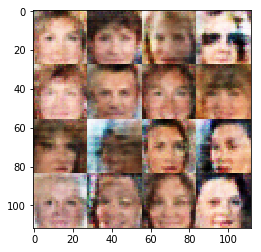

Epoch 0/1 Step 4100 Discriminator Loss, 1.4978666305541992 Generator Loss, 0.6015638113021851
Epoch 0/1 Step 4200 Discriminator Loss, 1.5241330862045288 Generator Loss, 0.5455888509750366


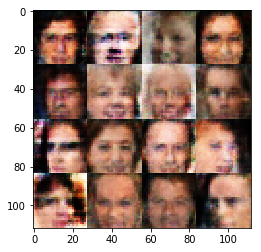

Epoch 0/1 Step 4300 Discriminator Loss, 1.663806676864624 Generator Loss, 0.47480273246765137
Epoch 0/1 Step 4400 Discriminator Loss, 1.5041546821594238 Generator Loss, 0.566497802734375


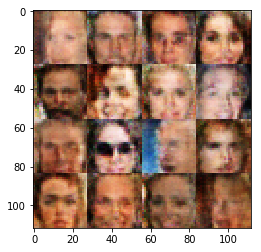

Epoch 0/1 Step 4500 Discriminator Loss, 1.4747118949890137 Generator Loss, 0.5827407836914062
Epoch 0/1 Step 4600 Discriminator Loss, 1.4719892740249634 Generator Loss, 0.5434950590133667


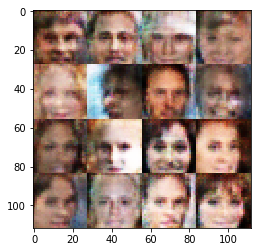

Epoch 0/1 Step 4700 Discriminator Loss, 1.4091241359710693 Generator Loss, 0.574702262878418
Epoch 0/1 Step 4800 Discriminator Loss, 1.4986443519592285 Generator Loss, 0.5568225979804993


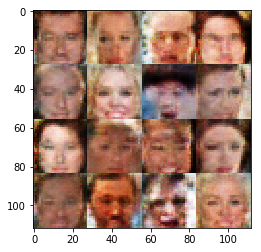

Epoch 0/1 Step 4900 Discriminator Loss, 1.582390308380127 Generator Loss, 0.542146623134613
Epoch 0/1 Step 5000 Discriminator Loss, 1.601258635520935 Generator Loss, 0.5126913785934448


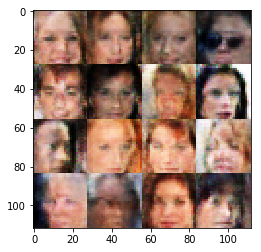

Epoch 0/1 Step 5100 Discriminator Loss, 1.4017879962921143 Generator Loss, 0.621422529220581
Epoch 0/1 Step 5200 Discriminator Loss, 1.493269920349121 Generator Loss, 0.5491464734077454


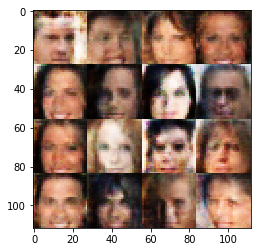

Epoch 0/1 Step 5300 Discriminator Loss, 1.5273315906524658 Generator Loss, 0.5595548152923584
Epoch 0/1 Step 5400 Discriminator Loss, 1.6301627159118652 Generator Loss, 0.5120399594306946


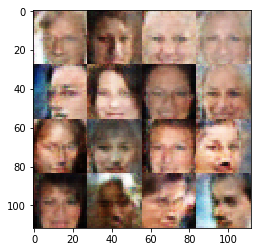

Epoch 0/1 Step 5500 Discriminator Loss, 1.5592401027679443 Generator Loss, 0.5561622381210327
Epoch 0/1 Step 5600 Discriminator Loss, 1.498055338859558 Generator Loss, 0.5671175718307495


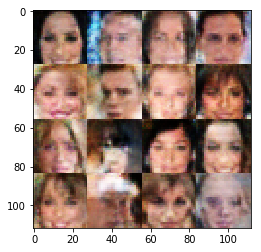

Epoch 0/1 Step 5700 Discriminator Loss, 1.5119997262954712 Generator Loss, 0.5641674995422363
Epoch 0/1 Step 5800 Discriminator Loss, 1.4381325244903564 Generator Loss, 0.6299556493759155


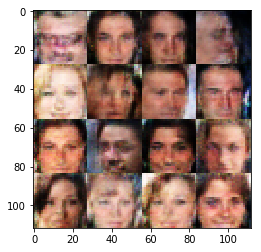

Epoch 0/1 Step 5900 Discriminator Loss, 1.5223054885864258 Generator Loss, 0.557246208190918
Epoch 0/1 Step 6000 Discriminator Loss, 1.5356276035308838 Generator Loss, 0.5150363445281982


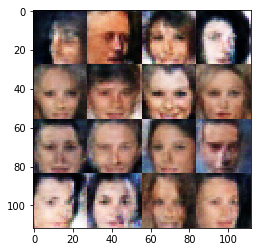

Epoch 0/1 Step 6100 Discriminator Loss, 1.4276435375213623 Generator Loss, 0.5811862945556641
Epoch 0/1 Step 6200 Discriminator Loss, 1.5469084978103638 Generator Loss, 0.5335478782653809


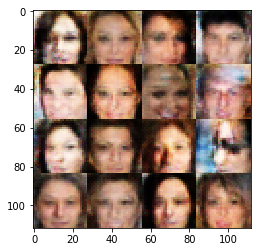

Epoch 0/1 Step 6300 Discriminator Loss, 1.4485971927642822 Generator Loss, 0.6250737905502319


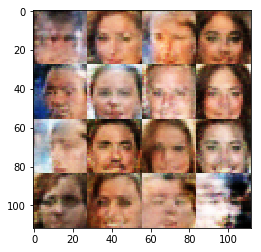

In [141]:
## breaks down. Faces form and then go away
batch_size, z_dim, learning_rate, beta1 = 25, 200, 0.0005, 0.3 ## Looking good

## bump dim seed on generator for 512, closert ot DCGAN
batch_size, z_dim, learning_rate, beta1 = 25, 200, 0.0006, 0.3 #good
batch_size, z_dim, learning_rate, beta1 = 25, 200, 0.0004, 0.3 #good
batch_size, z_dim, learning_rate, beta1 = 25, 200, 0.0001, 0.4 #good
batch_size, z_dim, learning_rate, beta1 = 25, 100, 0.0001, 0.4 #bad
batch_size, z_dim, learning_rate, beta1 = 64, 512, 0.0005, 0.3 #bad
batch_size, z_dim, learning_rate, beta1 = 32, 512, 0.0005, 0.3 #nope
batch_size, z_dim, learning_rate, beta1 = 32, 200, 0.0005, 0.3 #nope
batch_size, z_dim, learning_rate, beta1 = 32, 100, 0.0005, 0.3 #Not Bad

#Adding a layer
batch_size, z_dim, learning_rate, beta1 = 32, 100, 0.0002, 0.2 #Nope
batch_size, z_dim, learning_rate, beta1 = 32, 200, 0.0002, 0.2 #Not Bad
batch_size, z_dim, learning_rate, beta1 = 32, 200, 0.00025, 0.3 #Not Bad

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.